# CDA - Cancer Detection Assistant
This is a Data Analytics project by Alexander Busch, Jorge Orozco, Alexandre Carey and Tolgar Akar, March 2020.

This notebook is [CC BY 4.0 licensed](https://creativecommons.org/licenses/by/4.0/legalcode) and you are free to use it. Please use the follwing lines for appropriate attribution:<br>
*A. Busch, J. Orozco, A. Carey, T. Akar. "CDA - Cancer Detection Assistant". Published on GitHub.com, March 2020*.

Contents are a full documentation of the project, including graphs, explanations, and code, as well as the final derived model. Referencing Das & Dutta (2019) as main source, the contributions to the research community are:
- Sharing a state of the art model for cancer detection for high power field images
- Sharing the knowledge and code for all steps regarding the data pipeline
- Explaining the pros and contras of each step and of tested alternatives

Reference to our main source Das & Dutta, 2019:<br>
*Das, Dev Kumar, and Dutta, Pranab Kumar. "Efficient automated detection of mitotic cells from breast histological images using deep convolution neutral network with wavelet decomposed patches." Computers in biology and medicine 104 (2019): 29-42.*<br>
Further referencing can be found along the documentation.

The work on this project is part of the International Master of Data Analytics at the ISMLL of the University of Hildesheim. Over one year students are required to dedicatley research on current problem settings. This project group was supervised by Prof. Dr. Artus Krohn-Grimberghe, Prof. Dr. Dr. Lars Schmidt-Thieme, and M. Eng. Hadi Samer Jomaa and corporated with the LYTIQ GmbH.

## Abstract
Breast cancer is one of the most prevalent types of diesease in the modern days.
Because its early diagnosis is imperative to procure an effective tratmeant, many technological and scientific efforts are being put to this task. As a result, object detection and image classification with deep neural networks are being explored. We continue the work by Das & Dutta (2019), using a similar architecture for patch extraction with optimized heuristics, and compliment it with a ResNet18 NN to perform patch classification. We demonstrate empirically that a superior F1-score is achieved on the ICPR14 dataset compared to the state of the art. We present a Jupyter Notebook with the findings, working code, and further discussion on our results. 

## Introduction
During the pathology process, a pathologist must go through a stained high-power field image (HPF, 4542x4530 px) to detect abnormal cell formations, which are a couple of pixels wide. The main indicator of cancer is mitotic count, since cancer consists of uncontrolled cell growth. Because of the organic nature of the biopsy, the images tend to be noisy and irregular, creating a bigger challenge for the pathologists. Added to this fact, the specialists must cover a great number of patients during their workday. They must be able to provide a diagnosis in under 4 minutes per HPF on average if they want to go through all their patients. This challenging process of analyzing a high-resolution image is performed manually and under tight time constraints, making it prone to human error. Furthermore, a correct diagnosis is imperative. In other words, the results have a very low tolerance to mistakes, either for false positives or false negatives.

Our goal is to help pathologists during the identification stage of this process, not to replace them. We believe that a decent machine learning algorithm (utilizing computer vision) can lower the burden of pathologists by proposing them candidate cells that could be mitotic. Naturally, the final say whether those propsals are actually mitotic or non-mitotic will belong to the specialists.

![Pathology workflow](https://drive.google.com/uc?id=1fpjRQgl-q2s4ZDAeU1WNdh67dxC3_qSv)


Computer vision and object decetion has come a long way since early 2010s, after the introduction of convolutional neural networks (CNNs) into this field. Impressive results can be achieved in traditional object detection tasks using variety of different CNN architectures. However, this is not yet the case in some types of biomedical images, as in our case. Unlike the medical images we use for mitotic cell detection, traditional objection detection tries to locate much bigger and distinct objects, compared to a tiny cell on a stained histopathologiacal image. For untrained individuals, it is almost impossible to identify which cell is mitotic or not, whereas even toddlers can point out a coffe mug or a bottle on an image without breaking a sweat.


![Difficulty of medical CV](https://drive.google.com/uc?id=1ysoCkxTXdIjO7-6g6h3FX-MMcld_RxKh)


To understand as much as possible the topic we have been working on, we decided to organize our project into four main steps. The first and the longest step was acquiring enough knowledge not only about the mitosis detection and breast cancer, but also the fundamentals of computer vision and object detection. A lot of different research papers were read and exploited, the three most interesting ones are explained in the state-of-the-art section. The implementation of these papers was the goal of our second step, applying these moddels to basic object detection task allowed us to see if the models were applied correctly and fully working. The goal of the third step was to apply the re-implemented models to public breast cancer datasets like ICPR14 and then contribute by improving these models. The final step of the project consisted of using the improved models on the private dataset provided by the Freiburg Hospital. The aim of this step was to provide a working model which could be incorporated into a software to help the Freiburg Hospital with breast cancer diagnosis.


![Project workflow](https://drive.google.com/uc?id=13C2OJw9p2E8qEtkIXQIZ603JF1sU-Mf_)

## State of the art and Das & Dutta's (2019) approach
Chinese University of Hong Kong (CUHK) won the [Mitos Atypia 14 Grand Challenge](https://mitos-atypia-14.grand-challenge.org/), achieving 0.356 F1-score. Unfortunately, no details of their work were published. 

Later on, Li et al. (2018) achieved a better F1-score using a Region Proposal Network (RPN). What did they do was basically using the image files as the inputs of the network, creating region proposals out of it, and finally classify those proposals using a region-based classifier.

Approximately one year later, Das & Dutta (2019) published their paper, achieving the best result so far for the ICPR14 dataset (0.559 F1-score). For this reason, we decided to accept this paper as the current state-of-the-art, and base our main approach accordingly. Unlike the approach of Li et al.(2018), they extracted small patches (81x81 pixels) from the whole images after applying stain normalization and candidate cell detection, and then, classified those patches as mitotic or non-mitotic. In the candidate cell detection phase, they used heuristic methods, such as using blue ratio of the image to locate cell centroids. After the extraction, they employed Haar Wavelet decomposition for further downsampling the extracted images. Lastly, they used those downsampled patches as the input of their deep CNN.

![State_of_the_art](https://drive.google.com/uc?id=1QNtzqhtwiBZRo62lElvsqRQm4NI2-r0F)

## Data (ICPR14 and private)
The ICPR14 breast cancer dataset is a public dataset used in the [Mitos Atypia 14 Grand Challenge](https://mitos-atypia-14.grand-challenge.org/). It contains 1136 training frames at 40x magnification(377.8245 × 337.808 µm2) with mitosis centroid annotation for each one of them. The annotation were made by 3 pathologists using majority voting, the cells were annotated as mitotic or non-mitotic. The ICPR14 dataset, even though it does not contain much images, is a quality dataset: the work on different public datasets showed us that ICPR14 annotations are precise while other datasets might be less precise and error prone. Moreover, ICPR14 is used in many papers which allows us to compare our results with other methods. More detailed information can be found in the figure below.


![ICPR14 data](https://drive.google.com/uc?id=18_JAPzYGVTeCYBkP4r41ruGvU1QtuIYl)
Besides the public dataset which was used for assessing the results of the proposed model, a private breast cancer dataset was provided by the Freiburg Hospital. This dataset was challenging to use because it contains raw images in MRSX format that is difficult to handle. Furthermore, each image file weighted a couple of GB, making their processing slow. The data was annotated by pathologists of the Freiburg Hospital using Panoramic Viewer, a medical image viewer that is not supported anymore. Consequently, some other tools were explored to extract the medical annotations and reduce the size of the files(e.g. CaseViewer). Unfortunatley, the coordinates of the annotations extracted by such tools presented a deviation of some pixels compared to the bounding boxes in the actual images. Due to the time constraint and difficulties with this dataset, it was put aside. More information and the deviation details can be found in the image below.


![Freiburg data](https://drive.google.com/uc?id=19JUsn8Yn3OJOmpRQThSxtULulVuV9Lzk)

The Freiburg dataset was not used for the project but the tools to manage this type of medical images was investigated. For this purpose, different software and python libraries were tried in order for us to understand better these formats and highlight the goals of these tools. The figure below shows some of the tools which we used to process medical images. These tools are important because for medical images, there are usually no clear documentation on how to proceed and how to handle these heavy images. These tools are very useful for displaying large image files and processing them. There are many tools with their own specific features(images format, zoom levels, resolution...). The comparison table is provided for people who would like to start working with medical images. [PMA library](https://free.pathomation.com/) was the most accessible tool because it is very recent and still in development. It handles a lot of different formats (tiff, mrxs...) and it has a good documentation available. Furthermore, this library has an interesting feature which allows the user to convert the slide into a grid of images at a chosen zoom level.

![Tools](https://drive.google.com/uc?id=1xtOqYm7627VRwF5WeiHep1Tjevk4zZ0M)



## Method (Heuristics and Network)

Our main approach is based on the theoretical work of Das & Dutta (2019). Unfortunately, no code was shared and thus we tried to reimplement their approach. In broad terms, our method includes stain normalization, heuristics and patch extraction, similar to their work. However, we optimized the set of heuristics to detect the candidate cells and omitted the decomposition (see graphic below). 

During reimplementation and exploring the proposal generation described by Das & Dutta (2019), we discovered that after additionally smoothing the blue ration image, the proposal regions are revealed and could be sorted by their local maximum value. Statistics show that 95 % of all mitoses are within the first 44 proposals. This is a great improvement versus the 240 patches per slide before.

We decided to extract patches with the size of 71x71 px², whereas Das & Dutta (2019) used 81x81 px². Investigations showed that the cells fit into 71x71 px² and 81x81 px² thus only is advantageuos if downsized. While not downsizing, we trade the prevented information loss against possible noise reduction by the Haar Wavelet decomposition.

As another promising change we swapped Das & Dutta (2019)'s custom network against a pretrained ResNet18 on COCO data and applied transfer learning. Greater ResNets showed slightly better results but slowed down the training and experimenting steps. This is the reason why we decided to maintain this architecture. It is interesting to notice that a pretrained network on everyday objects performs better than one with random initialization.

![CDA method](https://drive.google.com/uc?id=131w_E24YzwWS3zFDZAbuTQCXOJjAWH5k)

The heuristics can be split into two parts (see graphic below). For the proposal generation the original image is stain-normalized (ref.: StainTools) and transformed into a single-channel blue ration image. Stain normalization is useful to level out the natural variations during the manual staining process. Mitotic cells are found to be highly visible in blue ratio images. Next, Otsu's thresholding based on the blue ratio histogramm is performed and a deeper Gaussian smoothening is applied. In layman's terms, the thresholding sets most of the background values to zero and clips the peak values to a certain maximum value. The smoothing then highlights heavily stained regions based on the amount and intensity of the surrounding pixels. Also, the resulting peak value of that region represents the amount and intensity of the region. All local maximum values are ultimately interpreted as centers of regions of interest.

Each 71x71 px² region around those local maxima is then individually smoothed and thresholded again for a more specific separation of the pixels. Also, the resulting mask is filled and smaller scattered mask values are erased. This is how the mask generator creates a fitting mask for each proposal. The mask is not necessary for an image classifier, but may be used for an object detector or for further explorative methods.

![Heuristics](https://drive.google.com/uc?id=1k3h2Tddy-M6RFOryR_AbhzCkUgaNK4nG)

Below an analysis of the found patches can be found. The first graph shows how close the found proposal centroids and the ground truth values are Values bigger than 12 can be reduced to non-centric annotations in the ground truth. This was reviewed by plotting the ground truth pixel and the centroid pixel of the heuristic in the same image.<br>
The second graph contrains the intensities of each local maximum pixel. Many proposals share the last bin of the histogramm, which is an expected result regarding the processing of the original image. The next graph displays at what position a mitosis is located in a descending sorted array of the local maximum pixel values. This is is most interesting graph, since it proves that 95 % of the mitoses lay withing the first 44 positions.

![Heuristics statistics](https://drive.google.com/uc?id=1NFXp7N5nAYUbT99UMd6rO-xfABAPuiNQ)

## Experiments and Code
- Loading data
- Heuristics
- Classification model
- Training protocol
- Full pipeline


### Loading the data into COCO-format
First, the data is obtained from [Mitos Atypia 14 Grand Challenge](https://mitos-atypia-14.grand-challenge.org/) and stored in a private cloud drive. This way it is directly transferrable to the cloud computing service. This project mainly relied on Groogle Colab and Google Drive. Regarding usability and comfort these two were superior to other services.

The raw data is saved as multiple .tiff-images with corresponding .csv-annotations per patient. Those images origin from one microscopy per patient and are only for processability stored as smaller sized images.<br>
Each patient's image set is moved at random into the 'training', 'validation', and 'test' folder and the annotations are gathered in a corresponding .json-file. For standardization, this .json-file is in the common [COCO format](http://cocodataset.org/#format-data). This way the data can be read barrier-free for both, the patch creation and examination with object detectors. The following graphic serves as illustration.

![Data_split](https://drive.google.com/uc?id=1W6rSnSwZorS0dyrVaSk3DJX55wYrkE0R)

In [0]:
# import drive
from google.colab import drive
drive.mount('/content/gdrive')


# download Aperio scanner data https://mitos-atypia-14.grand-challenge.org/Donwload/
# and put it in a convenient locacion in your Google Drive

# the images will be downloaded in tar.gz files. Un-tar every folder inside and 
# zip again into a file called ICPR14.zip


# load the data from Drive into local Colab storage
!unzip -q 'gdrive/Germany/Small_Study_Group/CDA/Data/ICPR14/ICPR14.zip'
!ls

In [0]:
# import modules
from pathlib import Path
import os
import json
import cv2
from google.colab.patches import cv2_imshow # if working on Colab
from shutil import copy
from collections import defaultdict
from skimage.feature import peak_local_max

In [0]:
# create the training, validation and test directories and
# create the three COCO-format .json-files
# define utility functions:

def get_coco_json():
    """Return an empty json dictionary to fill with coco formatted data"""
    return {
        'annotations':[], 
        'categories':[{  
            "id": 0,  # only one category, not-mitosis
            "name": "not_mit",
            "supercategory": "none"},
         {  
            "id": 1,  # only one category, mitosis
            "name": "mitosis",
            "supercategory": "none"}],
        'images': []
    }

def get_coco_data():
    """Return names and .json-files to process for training, validation and 
    testing including the chosen split. 
    First element in each list is training, 2nd is valid, then testing"""
    
    folder_names = ['train', 'valid', 'test']

    return {
        'eval_folders':
        [
            ['A04','A05','A07','A11','A12','A15','A18'],
            ['A03','A10','A14','A17'],
            ['A06','A08','A09','A13','A16']
        ],
        
        'folder_names':folder_names, 
        'json_names':[o+'.json' for o in folder_names],
        'coco_jsons':[get_coco_json() for o in range(len(folder_names))],
    }

def get_area(coord_dict):
    """Return area in [px x px] of the bounding box"""
    return ((coord_dict['max_width'] - coord_dict['min_width'] ) * 
        (coord_dict['max_height'] - coord_dict['min_height'] ))

def get_bbox(coord_dict):
    """Return coordinates(center) and size of the bounding box: [x,y,height,width]"""
    return [coord_dict['min_height'], 
    coord_dict['min_width'], 
    coord_dict['max_height'] - coord_dict['min_height'],
    coord_dict['max_width'] - coord_dict['min_width']]

def create_image_entry(image_path, original_image, img_list, img_idx):
    """Create an entry to the image list"""
    image = plt.imread(image_path)

    img_list.append({
        "file_name": image_path.name.replace('\\', '/'),
        "original_image": str(original_image).replace('\\', '/'),
        "height": image.shape[0],
        "id": img_idx,
        "width": image.shape[1]
    })

In [0]:
# Main:
########## sub-functions ###########

def get_annotation_coords(path, csv_file, padding=0):
    """Usng the ICPR14 folder architecture, read a csv file
    and extract the max-min cordinates of declared cells, then 
    return a dict with such coordinates.
    For each slide 2 corresponding csv files exist. One for mitoses and one for
    not-mitoses."""

    annots = []
    probabilities = [] # ICPR14 data set further provides probabilities

    # ==== Read csv file and extract each line ====
    with open(path / csv_file) as f:
        line = f.readline()

        while(line):
            line = line.split(',')
            annots.append([int(line[1]), int(line[0])])
            probabilities.append(float(line[2]))
            line = f.readline()

    # ==== get max and min height and width ====

    annots_coords = {}
    anot_id = 0

    for anot in annots:
        
        annots_coords[anot_id] = {
            'min_width':  anot[0],
            'max_width':  anot[0]+1, 
            'min_height': anot[1], 
            'max_height': anot[1]+1}

        anot_id += 1  # increase id

    return annots_coords, probabilities

########## Main functions ###########

def extract_mitotic_images(path=''):
    """Sort the slides into the new folder structure from the ICPR14 dataset.
    This code produces a folder with the train, valid, and test mitotic
    images, and for each a .json-file in the COCO format.
    Width and height are not provided and will be set to (1,1) px. They have
    to be evaluated later if needed, e.g. for an object detector."""

    icpr_path = Path(path)

    # Get the data necessary for the data extraction, returns dicitonary 
    coco = get_coco_data() # 'eval_folders','folder_names', 'json_names', 'coco_jsons'

    # Create path where training images will be saved
    coco_path = 'data/coco_format'
    if not os.path.exists(coco_path):
        os.makedirs(coco_path)

    # Counters used to keep image and annotation ids
    img_counter = 0
    annot_counter = 0

    # Change between train, valid, test phase
    for phase in range(3):
        json_file_name_mit = coco['json_names'][phase]

        # Create folder for saving images
        img_save_path = coco_path / coco['folder_names'][phase]
        if not os.path.exists(img_save_path):
            os.makedirs(img_save_path)

        # Iterate through subfolders
        for subfolder in coco['eval_folders'][phase]:
            print('folder progess:', subfolder)

            subfolder_path = (icpr_path / subfolder) / 'mitosis' # .csv files
            subfolder_tiff = (icpr_path / subfolder) / 'frames/x40' # .tiff files

            # Iterate through files to process data
            for file in os.listdir(subfolder_path):
                # the folder contains not_mitosis, mitosis and jpg per slide
                if file.endswith('not_mitosis.csv'):
                    file_name = file[:-16]  # remove suffix

                    image_name = file_name + '.tiff' # create .tiff name
                    image_name_after = str(img_counter) + '.tiff'

                    # Save image to its respective location
                    copy(subfolder_tiff / image_name, 
                        img_save_path / image_name_after)

                    # Create an entry to the json image file
                    create_image_entry(img_save_path / image_name_after,
                        subfolder_tiff / image_name,
                        coco['coco_jsons'][phase]['images'], 
                        img_counter)

                    # Extraction method calling
                    coords, probs = get_annotation_coords(subfolder_path, file)

                    for m in list(coords.keys()):
                        coco['coco_jsons'][phase]['annotations'].append({
                            "id": annot_counter,
                            "image_id": img_counter,
                            "category_id": 0,
                            "segmentation": [],
                            "area": co.get_area(coords[m]),
                            "bbox": co.get_bbox(coords[m]),
                            "iscrowd": 0,
                            "certainty_ICPR14": probs[m],
                        })
                        annot_counter += 1
                    img_counter += 1
                    
                elif file.endswith('mitosis.csv'):
                    file_name = file[:-12]  # Remove suffix
                    # .tiff file is stored in part above
                    # first, *not_mitosis.csv is read, then *mitosis.csv

                    # Extraction method calling
                    coords, probs = get_mitotic_coords(subfolder_path, file)

                    for m in list(coords.keys()):
                        coco['coco_jsons'][phase]['annotations'].append({
                            "id": annot_counter,
                            "image_id": img_counter,
                            "category_id": 1,
                            "segmentation": [],
                            "area": co.get_area(coords[m]),
                            "bbox": co.get_bbox(coords[m]),
                            "iscrowd": 0,
                            "certainty_ICPR14": probs[m]
                        })
                        annot_counter += 1

        # store .json file for each [train, test, valid] phase
        with open(coco_path / json_file_name_mit, 'w') as outfile:
            json.dump(coco['coco_jsons'][phase], outfile)

In [0]:
extract_mitotic_images('ICPR14')
print('extraction complete')

extraction complete


In [0]:
# Create zip for loading into the cloud
!zip -r ./data/coco_format.zip ./data/coco_format/

# Then, save files manually into Drive

### Creating the patches

First, load some sample images to understand existing differences in color between the slides. This results from the natural variability of the manual staining process. To level this out, a normalization procedure is introduced.

Also, we decided to reduce the patch size of 81x81 px² of our reference architecture to 71x71 px², since the cell sizes are still smaller and a decomposition is not planned. Next to the Coco data, we will create another data set which contains the cropped proposal patches. This is done to increase the learning time for the network.

In [0]:
# declare path that has coco_format files
path = Path('data/coco_format/')

In [0]:
# load the annotations twice: once purely and once with fast.ai
annots_train = json.load(open(path/'train.json')) # purely loaded
images_train, lbl_bbox_train = get_annotations(path/'train.json') # fast.ai built-in
annots_valid = json.load(open(path/'valid.json'))
images_valid, lbl_bbox_valid = get_annotations(path/'valid.json')
annots_test = json.load(open(path/'test.json'))
images_test, lbl_bbox_test = get_annotations(path/'test.json')
images, lbl_bbox = images_train+images_valid, lbl_bbox_train+lbl_bbox_valid

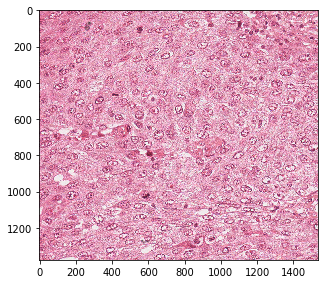

In [0]:
# load a sample image
img = cv2.imread( (path / 'train/{}'.format(images[0]) ).absolute().as_posix() )
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.show()

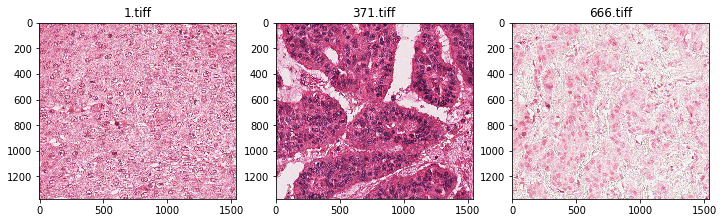

In [0]:
# Three different images, randomly chosen, for displaying differences in color
images_test_idxs = [0,301,500]
images_test = [images[o] for o in images_test_idxs]
images_test_arr = [cv2.cvtColor(cv2.imread((path / 'train/{}'.format(img_name)).absolute().as_posix() ),
                               cv2.COLOR_BGR2RGB) for img_name in images_test]

fig = plt.figure(figsize=(12,4))
for i in range(len(images_test)):
  ax = fig.add_subplot(1, len(images_test), i+1)
  ax.imshow(images_test_arr[i])
  ax.set_title(images_test[i])
plt.show()

#### Normalization

The necessary normalization is performed by using the StainTool library by Peter554 from GitHub ([repository](https://github.com/Peter554/StainTools)).

In [0]:
!pip install spams # Necessary for staintools, only possible on Linux
!pip install staintools

     |████████████████████████████████| 1.9MB 2.8MB/s 
  Created wheel for spams: filename=spams-2.6.1-cp36-cp36m-linux_x86_64.whl size=4512960 sha256=06706f73fcf1e98b60b6329fa5f52b648d1f531b300da7977c1c9afc809f3ce4
  Stored in directory: /root/.cache/pip/wheels/76/a6/a8/5959872693a82d5497a91aee3665bb1676cee33304d86c1495
Successfully built spams
  Created wheel for staintools: filename=staintools-2.1.2-cp36-none-any.whl size=14073 sha256=9347ad96bdb9f954a4451b195560a9c3e65c425e9f3909b83091b17027ca7a70
  Stored in directory: /root/.cache/pip/wheels/76/01/f8/81c62c374358f5baf8b278b5c57ab13534eb8f811bff1ddcb8
Successfully built staintools


In [0]:
import staintools

In [0]:
# Read data
target = staintools.read_image((path / 'train/{}'.format(images[0]) ).absolute().as_posix())
to_transform = staintools.read_image((path / 'train/{}'.format(images[0]) ).absolute().as_posix())

# Standardize brightness (This step is optional but can improve the tissue mask calculation)
target = staintools.LuminosityStandardizer.standardize(target)
to_transform = staintools.LuminosityStandardizer.standardize(to_transform)

# Stain normalize
normalizer = staintools.StainNormalizer(method='macenko')
normalizer.fit(target)
transformed = normalizer.transform(to_transform)

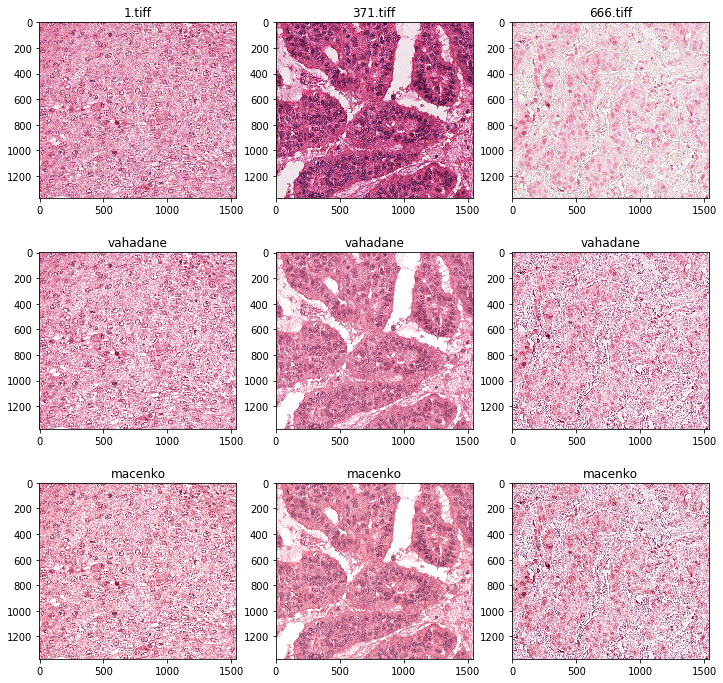

In [0]:
# prepare lists and normalizers
images_vahadane = [o.copy() for o in images_test_arr]
images_macenko = [o.copy() for o in images_test_arr]
normalizer_v = staintools.StainNormalizer(method='vahadane')
normalizer_m = staintools.StainNormalizer(method='macenko')

# Fit normalizers

# Although the library documentation recommends adjusting luminosity, 
# Our experiments showed that the was a slight decrease in F1 score, so it was
# ommited. 
# normalizer_v.fit(staintools.LuminosityStandardizer.standardize(images_test_arr[0]))
# normalizer_m.fit(staintools.LuminosityStandardizer.standardize(images_test_arr[0]))
normalizer_v.fit(images_test_arr[0])
normalizer_m.fit(images_test_arr[0])

fig = plt.figure(figsize=(12,12))
for i in range(len(images_test_arr)):
  # Standardize brightness (This step is optional but can improve the tissue mask calculation)
  # images_vahadane[i] = staintools.LuminosityStandardizer.standardize(images_vahadane[i])
  # images_macenko[i] = staintools.LuminosityStandardizer.standardize(images_macenko[i])

  # Perform stain normalization
  images_vahadane[i] = normalizer_v.transform(images_vahadane[i])
  images_macenko[i] = normalizer_m.transform(images_macenko[i])

  ax = fig.add_subplot(3, len(images_test_arr), i+1)
  ax.imshow(images_test_arr[i])
  ax.set_title(images_test[i])

  ax = fig.add_subplot(3, len(images_test_arr), i+4)
  ax.imshow(images_vahadane[i])
  ax.set_title('vahadane')

  ax = fig.add_subplot(3, len(images_test_arr), i+7)
  ax.imshow(images_macenko[i])
  ax.set_title('macenko')
plt.show()

# rows: original image, vahadane, macenko

The Macenko normlaization method is chosen, because quick tests showed a slight improvement versus the Vahadane method, also Vahadane is more recent.

#### Cut and store the patches and 

In [0]:
# Utility functions for image-pixel operations and preprocessing

def image_to_br(img_arr):
  """Transform one image as np.array with dimensions (height, width, RGB) into 
  a blue ratio transformation"""
  img_arr = img_arr.astype('float32')
  return img_arr[:,:,2]*100 / (img_arr[:,:,0] + img_arr[:,:,1] +1) * 256 / (np.sum(img_arr,2) +1)

def find_all_connected_neighbors(pix_start, img_mask):
  """pix_start expected as tuple, img_mask as np.array
  Returns all horizontally and vertically connected pixels of the entire 'blob'"""
  shape = img_mask.shape
  pix_in_blob = [pix_start] # connected pixels found, list will increase size if more pixels are found
  for pix in pix_in_blob:
    for up in [(0,1), (1,0), (0,-1), (-1,0)]:
      h, w = (pix[0] + up[0], pix[1] + up[1])
      h, w = (max(0, min(h, shape[0]-1)), max(0, min(w, shape[1]-1)))
      if img_mask[h, w] >= 1 and (h, w) not in pix_in_blob:
        pix_in_blob.append((h,w))
  return pix_in_blob

def find_blobs(img_mask):
  """Finds all blobs in a mask. Only consideres horizontal and vertical pixel
  connections. Goes through all pixls in image, when a masked pixels hits a blob
  skips all pixels in that blob """
  shape = img_mask.shape
  possible_pixels = np.ones((shape[0], shape[1])) # matrix will only have 1 and 0
  # Pixels located in a blob = 0. Unexplored pixels and subject to inspection = 1
  blobs = []
  for h in range(shape[0]):
    for w in range(shape[1]):
      if img_mask[h,w] > 0 and possible_pixels[h,w] >0:
        blob = find_all_connected_neighbors((h,w), img_mask)
        blobs.append(blob)
        for (a,b) in blob:
          possible_pixels[a,b] = 0
      possible_pixels[h,w] = 0
  return blobs

def find_center(blob):
  """Returns the center of a blob"""
  h_min, h_max = blob[0][0], blob[0][0]
  w_min, w_max = blob[0][1], blob[0][1]
  for h,w in blob:
    h_min = min(h_min, h)
    h_max = max(h_max, h)
    w_min = min(w_min, w)
    w_max = max(w_max, w)
  return (h_min + h_max)//2, (w_min + w_max) // 2

def extract_patches(blobs, shape, patch_size):
  """Returns the cropping region per blob with the predifined patch size.
  E.g. 71x71 px² per blob"""
  h_max, w_max = shape
  h_range, w_range = patch_size
  patches = []
  for blob in blobs:
    cent_h, cent_w = find_center(blob)
    # patch top-left corner
    patch_tl = (min(max(cent_h - h_range//2, 0), h_max-h_range), 
                min(max(cent_w - w_range//2, 0), w_max-w_range))
    patches.append(patch_tl + patch_size)
  return patches

def find_center_from_bbox(bbox):
  """Returns the center of a bounding box"""
  return (bbox[0] + bbox[2]) //2, (bbox[1] + bbox[3]) // 2

def extract_patches_from_bbox(bboxes, shape, patch_size):
  """Returns the cropping region per bounding box with the predifined patch size.
  E.g. 71x71 px² per blob"""
  h_max, w_max = shape
  h_range, w_range = patch_size
  patches = []
  for bbox in bboxes:
    cent_h, cent_w = find_center_from_bbox(bbox)
    patch_tl = (min(max(cent_h - h_range//2, 0), h_max-h_range), 
                min(max(cent_w - w_range//2, 0), w_max-w_range))
    patches.append(patch_tl + patch_size)
  return patches

def extract_patches_from_centers(centers, shape, patch_size):
  """Returns the cropping region per center with the predifined patch size.
  E.g. 71x71 px² per blob"""
  h_max, w_max = shape
  h_range, w_range = patch_size
  patches = []
  for (cent_h, cent_w) in centers:
    patch_tl = (min(max(cent_h - h_range//2, 0), h_max-h_range), 
                min(max(cent_w - w_range//2, 0), w_max-w_range))
    patches.append(patch_tl + patch_size)
  return patches

def delete_small_blobs(img_mask, blobs, n_pix_min):
  """If a blob of the listed blobs contains less than the minimum amount of
  pixels, it is dropped. This is for removing unwanted blobs. Not used in final
  version of extraction process"""
  shape = img_mask.shape
  blob_reducer = np.ones(shape)
  for blob in blobs:
    if len(blob) < n_pix_min:
      for h, w in blob:
        blob_reducer[h,w] = 0
  return img_mask * blob_reducer

def h_w_fill_of_a_blob(blob):
  """Masks somteimes have un-marked spaces inside. This function 
  joins the top-to-bottom and left-to-right pixels, eliminating 'holes' and
  creating a convex figure"""
  new_blob = []
  row_dict, col_dict = defaultdict(list), defaultdict(list)
  # Find all pixels per row and per column
  for (h,w) in blob:
    row_dict[h].append(w)
    col_dict[w].append(h) 
  # Connect min and max values per row and per column
  for h in row_dict.keys():
    for w in range(min(row_dict[h]), max(row_dict[h])+1):
      new_blob.append((h,w))
  for w in col_dict.keys():
    for h in range(min(col_dict[w]), max(col_dict[w])+1):
      if (h,w) not in new_blob: new_blob.append((h,w))
  return new_blob

def h_w_fill_of_all_blobs(img_mask, blobs, value=1):
  """Apply h_w_fill_of_a_blob on all listed blobs. Not used in final
  version of extraction process"""
  img_mask_return = img_mask.copy()
  new_blobs = []
  for blob in blobs:
    new_blobs.append(h_w_fill_of_a_blob(blob))
    img_mask_return[tuple(np.array(new_blobs[-1]).T)] = value
  return img_mask_return, new_blobs    

def circular_kernel(d):
  """Create a circular kernel for convolutional operations"""
    r = d//2
    A = np.arange(-r,r+1)**2
    dists = np.sqrt(A[:,None] + A)
    return ((dists-r)<0.5).astype(int)

def circular_kernel_negative(d):
  """Create a circular kernel for convolutional operations.
  Penalizing non-center pixels according to their radius,
  Summing up with the center pixel to a total of 1.
  This kernel is designed for detecting edges."""
  r = d//2
  A = np.arange(-r,r+1)**2
  dists = np.sqrt(A[:,None] + A) -r
  # turn distance values negative
  dist_thresh = (dists<=0).astype(int) * (-1)
  # sum center to the amount of negatives +1
  dist_thresh_sum = dist_thresh.sum()
  dist_thresh[r,r] = -dist_thresh_sum +1
  return dist_thresh

def create_mask_from_pix(pix_start, img_mask):
  """pix_coord is expected as tuple, img_mask as np.array.
  Finds all blobs in a mask. Only consideres horizontal and vertical pixel
  connections. Return new mask"""
  mask_new = np.zeros_like(img_mask, dtype=np.int8)
  blob = find_all_connected_neighbors(pix_start, img_mask)
  mask_new[tuple(np.array(blob).T)] = 1
  return mask_new

In [0]:
# functions that carry the utility functions

def find_proposal_centroids(img):
  """This function takes an RGB image as input, applies stain normalization,
  blue ratio transformation, Otsu's thresholding, Gaussian smoothing, 
  and finds local maxima. It returns the above mentioned transformations as a 
  list, as well as the indices of the local maxima"""
  img_list = []
  img_list.append(img)
  # normalization
  img_list.append(normalizer_m.transform(img))
  # blue ratio
  img_list.append(image_to_br(img_list[-1]))
  # find Otsu's Threshold value and define the relaxation parameters
  ot_th = cv2.threshold((img_list[-1]*1).astype('uint8'),0,1,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[0]
  ot_th_div = 4.0
  ot_th_high = ot_th*2.0
  # apply the thresholding including the relaxation parameters
  img_list.append(img_list[-1].copy())
  img_list[-1][img_list[-1]>=ot_th_high] = ot_th_high
  img_list[-1] = cv2.normalize(img_list[-1], None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
  img_list[-1][img_list[-1]<=1/ot_th_div] = 0.0
  # apply gaussion smoothing. Future work: join all smoothings to one matrix operation.
  img_list.append(cv2.GaussianBlur(img_list[-1],(11,11),0))
  img_list[-1] = cv2.GaussianBlur(img_list[-1],(7,7),0)
  img_list[-1] = cv2.GaussianBlur(img_list[-1],(5,5),0)
  img_list[-1] = cv2.GaussianBlur(img_list[-1],(3,3),0)
  img_list[-1] = cv2.GaussianBlur(img_list[-1],(11,11),0)
  img_list[-1] = cv2.GaussianBlur(img_list[-1],(7,7),0)
  img_list[-1] = cv2.GaussianBlur(img_list[-1],(5,5),0)
  img_list[-1] = cv2.GaussianBlur(img_list[-1],(3,3),0)
  img_list[-1] = cv2.GaussianBlur(img_list[-1],(11,11),0)
  img_list[-1] = cv2.GaussianBlur(img_list[-1],(7,7),0)
  img_list[-1] = cv2.GaussianBlur(img_list[-1],(5,5),0)
  img_list[-1] = cv2.GaussianBlur(img_list[-1],(3,3),0)
  img_list[-1] = cv2.GaussianBlur(img_list[-1],(11,11),0)
  img_list[-1] = cv2.GaussianBlur(img_list[-1],(7,7),0)
  img_list[-1] = cv2.GaussianBlur(img_list[-1],(5,5),0)
  img_list[-1] = cv2.GaussianBlur(img_list[-1],(3,3),0)
  img_list[-1] = cv2.normalize(img_list[-1], None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
  # Find local maxima
  img_indices = peak_local_max(img_list[-1], min_distance=25, threshold_abs=0.2, 
                               exclude_border=False, indices=True, labels=None)
  return img_list, img_indices

def find_mask_close_to_mit(img_list, indices, ppz=71):
  """image_list contains: original image, normalized image, blue ratio image, 
  Otsu's thresholded image, blurred image.
  Indices contain the proposed positions of local maxima"""
  shape = img_list[0].shape
  patch_list = [] # list, which contains the masks, and is finally returned
  for ind in indices:
    # Create croppings per indice twice as large as the ppz
    list_temp = []
    h_cent, w_cent = ind
    patch = (min(max(0,h_cent-ppz),shape[0]-ppz*2), min(max(0,w_cent-ppz),shape[1]-ppz*2), 
             max(min(h_cent+ppz+1,shape[0]+1),ppz*2+1), max(min(w_cent+ppz+1,shape[1]+1),ppz*2+1))
    ind_in_patch = [ind[0]-patch[0], ind[1]-patch[1]]
    # Create the croppings per processing step of the image list
    list_temp.append(img_list[0][patch[0]:patch[2], patch[1]:patch[3]])
    list_temp.append(img_list[1][patch[0]:patch[2], patch[1]:patch[3]])
    list_temp.append(img_list[2][patch[0]:patch[2], patch[1]:patch[3]])
    list_temp.append(img_list[3][patch[0]:patch[2], patch[1]:patch[3]])
    # Now individual image normalization can be applied per cropping
    list_temp.append(cv2.GaussianBlur(list_temp[-1],(3,3),0))
    list_temp[-1][list_temp[-1]>=0.70] = 0.70
    list_temp[-1] = cv2.normalize(list_temp[-1], None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    list_temp[-1][list_temp[-1]<=0.3] = 0.0

    th = list_temp[-1].max() * 0.85
    list_temp.append(cv2.threshold(list_temp[-1], th ,1,cv2.THRESH_BINARY)[1])

    kernel = circular_kernel(7).astype('uint8')
    list_temp.append(cv2.morphologyEx(list_temp[-1].astype('uint8'), cv2.MORPH_CLOSE, kernel))

    list_temp.append(create_mask_from_pix(ind_in_patch, list_temp[-1]*1))

    px_thresh = 220 # If blob is too small, a second approach is followed, this
    # has to be done because some shapes are not perfectly detected by the heuristics.
    if list_temp[-1].sum() <= px_thresh:
      list_temp = list_temp[:4]

      list_temp.append(cv2.GaussianBlur(list_temp[-1],(3,3),0))
      list_temp[-1][list_temp[-1]>=0.70] = 0.70
      list_temp[-1] = cv2.normalize(list_temp[-1], None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
      list_temp[-1][list_temp[-1]<=0.25] = 0.0

      list_temp.append(cv2.GaussianBlur(list_temp[-1],(15,15),0))
      list_temp[-1] = cv2.GaussianBlur(list_temp[-1],(11,11),0)
      list_temp[-1] = cv2.GaussianBlur(list_temp[-1],(7,7),0)
      list_temp[-1] = cv2.GaussianBlur(list_temp[-1],(5,5),0)
      list_temp[-1] = cv2.GaussianBlur(list_temp[-1],(7,7),0)
      list_temp[-1] = cv2.GaussianBlur(list_temp[-1],(5,5),0)

      th = list_temp[-1].max() * 0.50
      list_temp.append(cv2.threshold(list_temp[-1], th ,1,cv2.THRESH_BINARY)[1])

      list_temp.append(create_mask_from_pix(ind_in_patch, list_temp[-1]*1))

      kernel = circular_kernel(55).astype('uint8')
      mask_max = np.zeros_like(list_temp[-1])
      mask_max[ind_in_patch[0],ind_in_patch[1]] = 1
      mask_max = cv2.dilate((mask_max).astype('uint8'), kernel)
      list_temp[-1] = mask_max * list_temp[-1]
    
    # Pad the final mask with zeroes for a subsequent convolution with a circular kernel
    patch_shape = list_temp[-1].shape
    pad_val = 15
    patch_padded = np.pad(list_temp[-1], [(pad_val,pad_val), (pad_val,pad_val)], 
                          'constant', constant_values=0)
    kernel = circular_kernel(23).astype('uint8')
    list_temp.append(cv2.morphologyEx(patch_padded.astype('uint8'), cv2.MORPH_CLOSE, kernel)
                     [pad_val:patch_shape[0]+pad_val, pad_val:patch_shape[1]+pad_val])
    patch_list.append(list_temp)

  return patch_list

Cut, store and transact to drive.

In [0]:
# Target path
PATCHES = Path('patches_71_x_71_v8-95_conf') #  later created if not found

In [0]:
# Declare names
phases = ['train', 'valid', 'test']
json_list = ['train.json', 'valid.json', 'test.json']

# Load images and annotations
images_list, lbl_bbox_list = [[],[],[]],  [[],[],[]]
for phase in range(3):
  images_list[phase], lbl_bbox_list[phase] = get_annotations(PATH/ json_list[phase])

# Create output directories
if not os.path.exists(PATCHES): os.makedirs(PATCHES)
for phase in phases:
  if not os.path.exists(PATCHES/phase): os.makedirs(PATCHES/phase)
  if not os.path.exists(PATCHES/(phase+'/mitosis')): os.makedirs(PATCHES/(phase+'/mitosis'))
  if not os.path.exists(PATCHES/(phase+'/not_mit')): os.makedirs(PATCHES/(phase+'/not_mit'))
  if not os.path.exists(PATCHES/(phase+'/background')): os.makedirs(PATCHES/(phase+'/background'))

  if not os.path.exists(PATCHES/('masks/'+phase)): os.makedirs(PATCHES/('masks/'+phase))
  if not os.path.exists(PATCHES/('masks/'+phase+'/mitosis')): os.makedirs(PATCHES/('masks/'+phase+'/mitosis'))
  if not os.path.exists(PATCHES/('masks/'+phase+'/not_mit')): os.makedirs(PATCHES/('masks/'+phase+'/not_mit'))
  if not os.path.exists(PATCHES/('masks/'+phase+'/background')): os.makedirs(PATCHES/('masks/'+phase+'/background'))
PATCHES.ls()

[PosixPath('patches_71_x_71_v8-95_conf/valid'),
 PosixPath('patches_71_x_71_v8-95_conf/masks'),
 PosixPath('patches_71_x_71_v8-95_conf/test'),
 PosixPath('patches_71_x_71_v8-95_conf/train')]

In [0]:
ppz = 71//2 # Extraction size, halved patch_size
patch_size = (71,71) # For finding closest proposal to ground truth

# Run extractor, main preprocessing call
for i_p, phase in list(enumerate(phases)):
    images = images_list[i_p] # Select correct train or validation list
    lbl_bbox = lbl_bbox_list[i_p]

    for i1, img_name in list(enumerate(images)):
      img = cv2.imread( (PATH/'{}/{}'.format(phase, img_name)).absolute().as_posix() )
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      # Format the coordinates of the bounding boxes and separating between mitosis and non-mitosis    
      bboxes_mitosis = [tuple(box) for box, lbl in zip(lbl_bbox[i1][0], lbl_bbox[i1][1]) if lbl == 'mitosis']
      bboxes_not_mit = [tuple(box) for box, lbl in zip(lbl_bbox[i1][0], lbl_bbox[i1][1]) if lbl == 'not_mit']
      shape = img.shape[:2]
    
      # Find proposals and store processings, sort proposals by intensitiy of local maximum
      img_list, img_indices = find_proposal_centroids(img)
      intensities = np.array([img_list[-1][ind[0],ind[1]] for ind in img_indices])
      indexes_sort = (intensities.argsort())[::-1] # highest intensity at position 0
      intensities_arr = intensities[indexes_sort]
      img_indices_arr = np.array(img_indices)[indexes_sort]
      img_indices = img_indices_arr.tolist()
    
      # Extract mitosis bboxes/annotations first
      patches_mitosis = extract_patches_from_bbox(bboxes_mitosis, shape, patch_size)
      patches_for_censoring = [] # for later remover; to prevent double counting
      for i2, (patch, bbox) in enumerate( zip(patches_mitosis, bboxes_mitosis)):
        patch = (patch[0], patch[1], patch[0]+patch[2], patch[1]+patch[3])

        # Find closest proposal, return patches_temp, a list with final entry -> mask
        indices_temp = [o for o in img_indices if (o[0] >= patch[0] and o[0] <= patch[2] and 
                                                   o[1] >= patch[1] and o[1] <= patch[3])]
        indices_temp_dist = [np.linalg.norm(np.array(bbox[:2])-np.array(o)) for o in indices_temp]
        try: indices_temp = [list(indices_temp[np.argmin(indices_temp_dist)])] # best element left in list
        except: 
          indices_temp = [patch[:2]] # if no proposal exist, extract original patch
        patches_temp = find_mask_close_to_mit(img_list, indices_temp, ppz=ppz) # list of lists
        
        # Update patch coordinates with found ones (which are very similar/near)
        patch = extract_patches_from_centers(indices_temp, shape, (ppz*2+1, ppz*2+1))[0]
        patch = (patch[0], patch[1], patch[0]+patch[2], patch[1]+patch[3])

        # Write to disk the extraction from the original image and the mask 
        p1 = (PATCHES/'{0}/mitosis/raw_{1:0>4}_{2:0>4}_{3:0>4}_{4:0>4}.bmp'
              .format(phase, img_name[:-5], i2, patch[0], patch[1])).absolute().as_posix()
        p2 = (PATCHES/'masks/{0}/mitosis/mask_{1:0>4}_{2:0>4}_{3:0>4}_{4:0>4}.bmp'
              .format(phase, img_name[:-5], i2, patch[0], patch[1])).absolute().as_posix()
        cv2.imwrite(p1, img_list[ 0][patch[0]:patch[2], patch[1]:patch[3]].astype('uint8'))
        cv2.imwrite(p2, patches_temp[0][-1].astype('uint8')*255)

        patches_for_censoring.append(patch)
      
      # Remove found patches from the image, from the mask, and from the indices
      for patch in patches_for_censoring:
        img_list[ 0][patch[0]:patch[2], patch[1]:patch[3]] = 0
        img_list[-2][patch[0]:patch[2], patch[1]:patch[3]] = 0
        img_indices = [o for o in img_indices if ((o[0] not in range(patch[0],patch[2]+1)) or 
                                                  (o[1] not in range(patch[1],patch[3]+1)))]

      # Extract not_mit bboxes/annotations
      patches_not_mit = extract_patches_from_bbox(bboxes_not_mit, shape, patch_size)
      patches_for_censoring = []
      for i2, (patch, bbox) in enumerate( zip(patches_not_mit, bboxes_not_mit)):
        patch = (patch[0], patch[1], patch[0]+patch[2], patch[1]+patch[3])

        # Find closest proposal, return patches_temp, a list with final entry -> mask
        indices_temp = [o for o in img_indices if (o[0] >= patch[0] and o[0] <= patch[2] and 
                                                   o[1] >= patch[1] and o[1] <= patch[3])]
        indices_temp_dist = [np.linalg.norm(np.array(bbox[:2])-np.array(o)) for o in indices_temp]
        try: indices_temp = [list(indices_temp[np.argmin(indices_temp_dist)])] # best element left in list
        except: 
          indices_temp = [patch[:2]] # If no proposal exist, extract original patch
        patches_temp = find_mask_close_to_mit(img_list, indices_temp, ppz=ppz) # list of lists
        
        # Overwrite patch coordinates with slightly different found ones
        patch = extract_patches_from_centers(indices_temp, shape, (ppz*2+1, ppz*2+1))[0]
        patch = (patch[0], patch[1], patch[0]+patch[2], patch[1]+patch[3])

        # Write to disk extraction from original image and mask 
        p1 = (PATCHES/'{0}/not_mit/raw_{1:0>4}_{2:0>4}_{3:0>4}_{4:0>4}.bmp'
              .format(phase, img_name[:-5], i2, patch[0], patch[1])).absolute().as_posix()
        p2 = (PATCHES/'masks/{0}/not_mit/mask_{1:0>4}_{2:0>4}_{3:0>4}_{4:0>4}.bmp'
              .format(phase, img_name[:-5], i2, patch[0], patch[1])).absolute().as_posix()
        cv2.imwrite(p1, img_list[ 0][patch[0]:patch[2], patch[1]:patch[3]].astype('uint8'))
        cv2.imwrite(p2, patches_temp[0][-1].astype('uint8')*255)

        patches_for_censoring.append(patch)

      # Remove not_mit from image, from mask, and from indices
      for patch in patches_for_censoring:
        img_list[ 0][patch[0]:patch[2], patch[1]:patch[3]] = 0
        img_list[-2][patch[0]:patch[2], patch[1]:patch[3]] = 0
        img_indices = [o for o in img_indices if ((o[0] not in range(patch[0],patch[2]+1)) or 
                                                  (o[1] not in range(patch[1],patch[3]+1)))]

      # Extract background patches, update img_indices confidence interval, 44 for 95 %
      img_indices = img_indices[:int(45-len(patches_mitosis)-len(patches_not_mit))]
      patches_bg = extract_patches_from_centers(img_indices, shape, (ppz*2+1, ppz*2+1)) # extraction size
      for i2, (patch, ind) in enumerate( zip(patches_bg, img_indices)):
        patch = (patch[0], patch[1], patch[0]+patch[2], patch[1]+patch[3])
        
        # Create mask for each patch        
        indices_temp = [ind] # one element left in list
        patches_temp = find_mask_close_to_mit(img_list, indices_temp, ppz=ppz) # list of lists
        
        # Write to disk extraction from original image and mask 
        p1 = (PATCHES/'{0}/background/raw_{1:0>4}_{2:0>4}_{3:0>4}_{4:0>4}.bmp'
              .format(phase, img_name[:-5], i2, patch[0], patch[1])).absolute().as_posix()
        p2 = (PATCHES/'masks/{0}/background/mask_{1:0>4}_{2:0>4}_{3:0>4}_{4:0>4}.bmp'
              .format(phase, img_name[:-5], i2, patch[0], patch[1])).absolute().as_posix()
        cv2.imwrite(p1, img_list[ 0][patch[0]:patch[2], patch[1]:patch[3]].astype('uint8'))
        cv2.imwrite(p2, patches_temp[0][-1].astype('uint8')*255)

      print(img_name,', ', len(patches_mitosis), ' patches mitosis, ',
                           len(patches_not_mit), ' patches not_mit, ',
                           len(patches_bg), ' patches background', sep='')  
print('extraction complete')

1.tiff, 3 patches mitosis, 0 patches not_mit, 42 patches background
2.tiff, 2 patches mitosis, 0 patches not_mit, 43 patches background
3.tiff, 1 patches mitosis, 0 patches not_mit, 44 patches background
4.tiff, 0 patches mitosis, 1 patches not_mit, 44 patches background
5.tiff, 6 patches mitosis, 1 patches not_mit, 38 patches background
6.tiff, 3 patches mitosis, 0 patches not_mit, 42 patches background
7.tiff, 1 patches mitosis, 0 patches not_mit, 44 patches background
8.tiff, 2 patches mitosis, 0 patches not_mit, 43 patches background
9.tiff, 2 patches mitosis, 0 patches not_mit, 43 patches background
10.tiff, 3 patches mitosis, 1 patches not_mit, 41 patches background
12.tiff, 4 patches mitosis, 0 patches not_mit, 41 patches background
13.tiff, 4 patches mitosis, 0 patches not_mit, 41 patches background
15.tiff, 1 patches mitosis, 2 patches not_mit, 42 patches background
16.tiff, 9 patches mitosis, 0 patches not_mit, 36 patches background
17.tiff, 2 patches mitosis, 0 patches not_m

In [0]:
# Create a .zip for transferring to the cloud
!zip -r ./patches_71_x_71_v8-95_conf.zip ./patches_71_x_71_v8-95_conf/
# transfer into Drive manually

### Find the best training protocol

Some things tried, some fine tunig tried, fast.ai as library, fast.ai course, credits to knowlege providers

The data was split into training, validation, and test set. The training and validation set are used to find the best training protocol. Having found this protocol, both sets are combined and the training is repeated. The resulting model is then evaluated on the test data. This process prevents overfitting on the test set and mimics the competition process of evaluating on unseen data.

The tried approaches are listed below and are indices with +/o/- to show their impact on the F1-score. This notebook provides a concise but clear guideline about the CDA project. Thus we decided to not overextend and to omit the exploratory research performed on most of these approaches.

![Approaches 1/2](https://drive.google.com/uc?id=1wdPdpYrqLCjz0sTtPwXG1eT09zfo8C3s)

![Approaches 2/2](https://drive.google.com/uc?id=1ML0NykwSu0r4agxFR6nMzrMkwB1a0ZKP)


In [0]:
# Imported libraries
from fastai.vision import *
# from fastai.metrics import error_rate, accuracy, Precision, Recall, FBeta
# custom metrics were used...
from fastai.callbacks import * # for data sampler

import torch
from torch import nn
from torch.autograd import Variable

import matplotlib.pyplot as plt
%matplotlib inline

# for reloading the modules
# %reload_ext autoreload
# %autoreload 2

In [0]:
# Example of used hardware in Google Colab
!nvidia-smi

Mon Jan 20 08:07:36 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.44       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8    10W /  70W |     10MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

## Classification on cropped patches with 71x71 px²


In [0]:
# Download data (can be skipped if the session is still up)
# select location where zip files will be located
!unzip -q 'gdrive/[...]/ICPR14/patches_71_x_71_v8-95_conf.zip'
!ls

gdrive	patches_71_x_71_v8-95_conf  sample_data


In [0]:
# Declare paths
MODELS = Path('gdrive/[...]/Models') # location of models. Create if not already
PATH = Path('')
PATCHES = Path('patches_71_x_71_v8-95_conf')

In [0]:
# In the fastai framework, test datasets have no labels - this is the unknown data 
# to predict on. If a model should be validated on a test dataset with 
# labels, you can load it as a validation set later.
bs = 48 # batch size
data = ImageDataBunch.from_folder(PATCHES, size=71, bs=bs).normalize()
print(data.classes, data.c, '\n')
data

['background', 'mitosis', 'not_mit'] 3 



ImageDataBunch;

Train: LabelList (23625 items)
x: ImageList
Image (3, 71, 71),Image (3, 71, 71),Image (3, 71, 71),Image (3, 71, 71),Image (3, 71, 71)
y: CategoryList
not_mit,not_mit,not_mit,not_mit,not_mit
Path: patches_71_x_71_v8-95_conf;

Valid: LabelList (15300 items)
x: ImageList
Image (3, 71, 71),Image (3, 71, 71),Image (3, 71, 71),Image (3, 71, 71),Image (3, 71, 71)
y: CategoryList
not_mit,not_mit,not_mit,not_mit,not_mit
Path: patches_71_x_71_v8-95_conf;

Test: None

In [0]:
# Display the distribution of data: background, mitosis and non-mitosis
print('train', np.unique(data.train_ds.y.items, return_counts=True))
print('valid', np.unique(data.valid_ds.y.items, return_counts=True))
_, (n_bgr, n_mit, n_not_mit) = np.unique(data.train_ds.y.items, return_counts=True)

train (array([0, 1, 2]), array([21381,   522,  1722]))
valid (array([0, 1, 2]), array([13911,   227,  1162]))


In [0]:
# Custom metrics are designed for calculating binary results in a 
# multi-class problem. For the final model binary classification worked best
# which makes these custom metrics redundant to the built-in ones.
# Also, a Focal Loss class was created but found to be inferior to upsample the 
# underrepresented class. Still, we decided to publish it since it may help
# other Data Analysts in their work.
class one_Precision(Callback):
    def __init__(self, target_class=1):
        """target_class is the desired class. Remaining classes are treated gathered 
        as background"""
        super().__init__()
        self.target_class = target_class
    
    def on_epoch_begin(self, **kwargs):
        self.correct, self.total = 0, 0
    
    def on_batch_end(self, last_output, last_target, **kwargs):
        preds = last_output.argmax(1)
        self.correct += ((preds==self.target_class) * (last_target==self.target_class)).float().sum()
        self.total += (preds==self.target_class).float().sum()
    
    def on_epoch_end(self, last_metrics, **kwargs):
        return add_metrics(last_metrics, self.correct/self.total)

class one_Accuracy(Callback):
    """Since Accuracy takes TP+TN, classes don't have to be differentiated"""  
    def on_epoch_begin(self, **kwargs):
        self.correct, self.total = 0, 0
    
    def on_batch_end(self, last_output, last_target, **kwargs):
        preds = last_output.argmax(1)
        self.correct += (preds==last_target).float().sum()
        self.total += float(last_target.shape[0])
    
    def on_epoch_end(self, last_metrics, **kwargs):
        return add_metrics(last_metrics, self.correct/self.total)

class one_Recall(Callback):
    def __init__(self, target_class=int(1)):
        """target_class is the desired class. Remaining classes are treated gathered 
        as background"""
        super().__init__()
        self.target_class = target_class
    
    def on_epoch_begin(self, **kwargs):
        self.correct, self.total = 0, 0
    
    def on_batch_end(self, last_output, last_target, **kwargs):
        preds = last_output.argmax(1)
        self.correct += ((preds==self.target_class) * (last_target==self.target_class)).float().sum()
        self.total += (last_target==self.target_class).float().sum()
    
    def on_epoch_end(self, last_metrics, **kwargs):
        return add_metrics(last_metrics, self.correct/self.total)

class one_F1Score(Callback):
    def __init__(self, target_class=1):
        """target_class is the desired class. Remaining classes are treated gathered 
        as background"""
        super().__init__()
        self.target_class = target_class
    
    def on_epoch_begin(self, **kwargs):
        self.correct, self.total1, self.total2 = 0, 0, 0
    
    def on_batch_end(self, last_output, last_target, **kwargs):
        preds = last_output.argmax(1)
        self.correct += ((preds==self.target_class) * (last_target==self.target_class)).float().sum()
        self.total1 += (preds==self.target_class).float().sum()
        self.total2 += (last_target==self.target_class).float().sum()
        
    def on_epoch_end(self, last_metrics, **kwargs):
        self.c_Prec = self.correct/self.total1
        self.c_Reca = self.correct/self.total2
        return add_metrics(last_metrics, 2*self.c_Reca*self.c_Prec / (self.c_Reca+self.c_Prec))

# FocalLoss was used during finding the best training protocol but was discarded later.
# FocalLoss is not relevant for the final model.

class FocalLoss(nn.Module):
    """
        from: https://github.com/clcarwin/focal_loss_pytorch/blob/master/focalloss.py
        This criterion is a implemenation of Focal Loss, which is proposed in 
        Focal Loss for Dense Object Detection.
            
            Loss(x, class) = - \alpha (1-softmax(x)[class])^gamma \log(softmax(x)[class])
    
        The losses are averaged across observations for each minibatch.
        Args:
            alpha(1D Tensor, Variable) : the scalar factor for this criterion, classic weights,
                                         inverted class occurences
            gamma(float, double) : gamma > 0; reduces the relative loss for well-classiﬁed examples (p > .5), 
                                   putting more focus on hard, misclassiﬁed examples
            size_average(bool): size_average(bool): By default, the losses are averaged over observations for each minibatch.
                                However, if the field size_average is set to False, the losses are
                                instead summed for each minibatch.
    """
    def __init__(self, class_num=3, weight=None, gamma=2.0, size_average=True, reduction='mean'):
        super(FocalLoss, self).__init__()

        if weight is None: self.weight = Variable(torch.ones(class_num, 1))
        elif isinstance(weight, (int, float)): self.weight = Variable(torch.ones(class_num, 1)*weight)
        else:
            if isinstance(weight, Variable): self.weight = weight
            else: self.weight = Variable(weight)
        self.gamma = gamma
        self.class_num = class_num
        self.size_average = size_average
        self.reduction = reduction

    def forward(self, inputs, targets):
        N = inputs.size(0)
        C = inputs.size(1)
        P = F.softmax(inputs, dim=-1)

        class_mask = inputs.data.new(N, C).fill_(0) # .data detaches the tensor from the computation graph
        class_mask = Variable(class_mask)
        ids = targets.view(-1, 1) # one hot targets in next line
        class_mask.scatter_(1, ids.data, 1.) # fill class_mask with correct target positions     

        if inputs.is_cuda and not self.weight.is_cuda:
            self.weight = self.weight.cuda()
        weight = self.weight[ids.data.view(-1)]
        alphas = self.weight[targets.data.view(-1)]
        if inputs.is_cuda and not alphas.is_cuda:
            alphas = alphas.cuda()
        
        # only correct class is backpropagated...
        probs = (P*class_mask).sum(1).view(-1,1)

        log_p = probs.log()

        batch_loss = -alphas*(torch.pow((1-probs), self.gamma))*log_p 

        if self.size_average:
            loss = batch_loss.mean()
        else:
            loss = batch_loss.sum()
        return loss

### Estimate the best training protocol

After 100+ different iterations only the best training protocol is presented.

In [0]:
# using fast.ai methods
# Declare transformations and load the training data
tfms = get_transforms(do_flip=True, flip_vert=True, max_rotate=360.0, max_zoom=1.25, 
              max_lighting=0.1, max_warp=0.1, p_affine=0.75, p_lighting=0.75)
bs = 48 # Batch size

# Load data
data = ImageDataBunch.from_folder(PATCHES, ds_tfms=tfms, size=71, bs=bs)

# Retrieve data set mean and std for normalization
n_batches = (len(data.train_ds.x.items)-1) // bs +1
stats_mean, stats_std = data.batch_stats()
for i in range(n_batches-1):
  i_mean, i_std = data.batch_stats()
  stats_mean += i_mean
  stats_std += i_std
dataset_stats = stats_mean/n_batches, stats_std/n_batches
print("Mean and std of the training set are {}".format(dataset_stats))

data.normalize(dataset_stats)

# Reduce to 2 classes
y_dict = {0:0, 1:1, 2:0}
data.train_ds.y.items = np.array([y_dict[o] for o in data.train_ds.y.items])
data.valid_ds.y.items = np.array([y_dict[o] for o in data.valid_ds.y.items])
data.classes = ['background', 'mitosis']
data.c = 2

weights = [1.0, 1.0]
class_weights=torch.FloatTensor(weights).cuda()
metrics = [error_rate, one_Accuracy(), one_Precision(target_class=1), 
           one_Recall(target_class=1), one_F1Score(target_class=1)]
crit = nn.CrossEntropyLoss(weight=class_weights)
learn = cnn_learner(data, models.resnet18, loss_func=crit, metrics=metrics)

mean and std of the training set are (tensor([0.6846, 0.6203, 0.8357]), tensor([0.1778, 0.2072, 0.1407]))


In [0]:
# First train the final layers and save the network state
oscb = OverSamplingCallback(learn)
learn.fit(2, lr=slice(1e-6, 2e-4), callbacks = oscb)
learn.save((MODELS/'2020-01-21_resnet18_71_x_71_v7_s1').absolute())

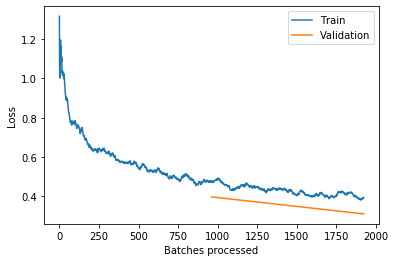

In [0]:
learn.recorder.plot_losses()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


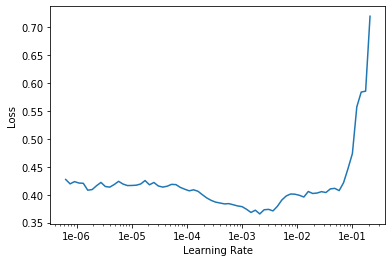

In [0]:
# Find an optimal learning rate. This is done by plotting the used learning rate
# over the corresponding training loss.
# The optimal learning rate is greatest number before the steep increase of the error.
learn.unfreeze() # unfreezes the other layers
learn.lr_find()
learn.recorder.plot()

In [0]:
# Train the entire network and save the network state
# The learning rate is reduced for the first layers via slice(...)
learn.load((MODELS/'2020-01-21_resnet18_71_x_71_v7_s1').absolute())
oscb = OverSamplingCallback(learn)
learn.fit_one_cycle(30, max_lr=slice(1e-4, 1e-3), callbacks = oscb)
learn.save((MODELS/'2020-01-21_resnet18_71_x_71_v7_s2').absolute())

Buffered data was truncated after reaching the output size limit.

In [0]:
# "Buffered data was truncated after reaching the output size limit."
# ...sometimes the Colab session gets interrupted. This is not affecting the
# results, only the display. Below the final graph is shown.

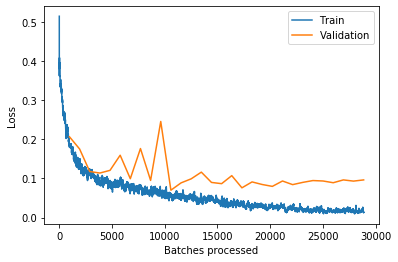

In [0]:
learn.recorder.plot_losses()

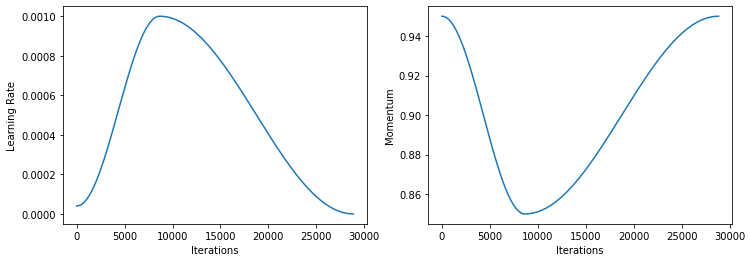

In [0]:
# This is how the Learning rate behaved
learn.recorder.plot_lr(show_moms=True)

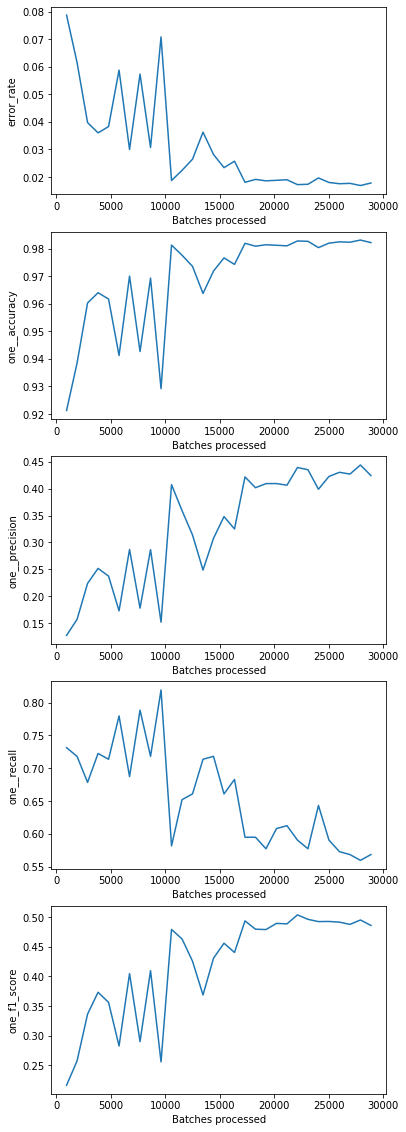

In [0]:
learn.recorder.plot_metrics()

In [0]:
# Save the learning rate and the metrics of the training for documentation.
lrs = np.array(learn.recorder.lrs)
metrics = np.array([[tensor(o).item() for o in epoch] for epoch in learn.recorder.metrics])

name = (MODELS/'2020-01-21_resnet18_71_x_71_v7_s2_lrs.csv').absolute()
np.savetxt(name, lrs, delimiter= ',')

name = (MODELS/'2020-01-21_resnet18_71_x_71_v7_s2_metrics.csv').absolute()
np.savetxt(name, metrics, delimiter= ',')

In [0]:
# Save the losses of the training for documentation.
train_losses = np.array([o.item() for o in learn.recorder.losses])
valid_losses = np.array([o.item() for o in learn.recorder.val_losses])
num_batches  = np.array(learn.recorder.nb_batches)

name = (MODELS/'2020-01-21_resnet18_71_x_71_v7_s2_train_losses.csv').absolute()
np.savetxt(name, train_losses, delimiter= ',')

name = (MODELS/'2020-01-21_resnet18_71_x_71_v7_s2_val_losses.csv').absolute()
np.savetxt(name, valid_losses, delimiter= ',')

name = (MODELS/'2020-01-21_resnet18_71_x_71_v7_s2_num_batches.csv').absolute()
np.savetxt(name, num_batches, delimiter= ',')

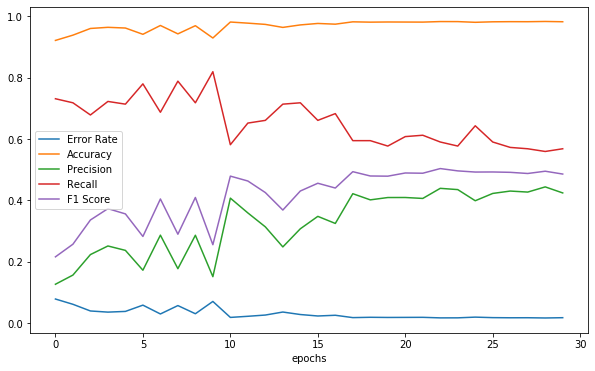

In [0]:
# Plot the metrics in one graph
fig = plt.figure(figsize=(10,6))
plt.plot(np.arange(len(metrics)), metrics[:, 0], label='Error Rate')
plt.plot(np.arange(len(metrics)), metrics[:, 1], label='Accuracy')
plt.plot(np.arange(len(metrics)), metrics[:, 2], label='Precision')
plt.plot(np.arange(len(metrics)), metrics[:, 3], label='Recall')
plt.plot(np.arange(len(metrics)), metrics[:, 4], label='F1 Score')
plt.legend()
plt.xlabel('epochs')
plt.show()

### Retraining on full data and testing

After having found the optimal training protocol, the joint training and validation set are used to train on.

In [0]:
# Load training data
tfms = get_transforms(do_flip=True, flip_vert=True, max_rotate=360.0, max_zoom=1.25, 
              max_lighting=0.1, max_warp=0.1, p_affine=0.75, p_lighting=0.75)
bs = 48 # Batch size

# new train set = train + valid, validation set remains
# Combine training and validation set to have more training data
data = ImageDataBunch.from_folder(PATCHES, ds_tfms=tfms, size=71, bs=bs)
data.train_ds.x.items = np.append(data.train_ds.x.items, data.valid_ds.x.items)
data.train_ds.y.items = np.append(data.train_ds.y.items, data.valid_ds.y.items)

# Retrieve data set mean and std for normalization
n_batches = (len(data.train_ds.x.items)-1) // bs +1
stats_mean, stats_std = data.batch_stats()
for i in range(n_batches-1):
  i_mean, i_std = data.batch_stats()
  stats_mean += i_mean
  stats_std += i_std
dataset_stats = stats_mean/n_batches, stats_std/n_batches
print("mean and std of the training set are {}".format(dataset_stats))

data.normalize(dataset_stats)

# Reduce to 2 classes
y_dict = {0:0, 1:1, 2:0}
data.train_ds.y.items = np.array([y_dict[o] for o in data.train_ds.y.items])
data.valid_ds.y.items = np.array([y_dict[o] for o in data.valid_ds.y.items])
data.classes = ['background', 'mitosis']
data.c = 2

weights = [1.0, 1.0]
class_weights=torch.FloatTensor(weights).cuda()
metrics = [error_rate, one_Accuracy(), one_Precision(target_class=1), 
           one_Recall(target_class=1), one_F1Score(target_class=1)]
crit = nn.CrossEntropyLoss(weight=class_weights)
learn = cnn_learner(data, models.resnet18, loss_func=crit, metrics=metrics, 
                     callback_fns=ShowGraph)

mean and std of the training set are (tensor([0.6880, 0.6247, 0.8384]), tensor([0.1798, 0.2103, 0.1430]))


Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 92.6MB/s]


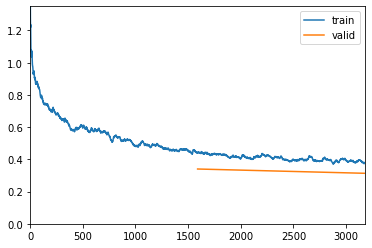

In [0]:
# First train the final layers and save the network state
oscb = OverSamplingCallback(learn)
learn.fit(2, lr=slice(1e-6, 2e-4), callbacks = oscb)
learn.save((MODELS/'2020-01-16_resnet18_71_x_71_v3_s1').absolute())

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


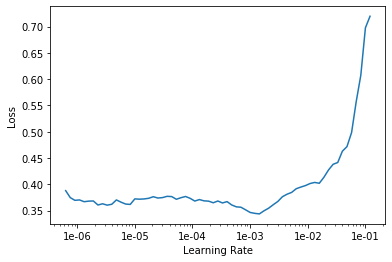

In [0]:
# The learning rate from the training protocol is asserted.
learn.unfreeze() # unfreezes the other layers
learn.lr_find()
learn.recorder.plot()

In [0]:
# Train the entire network and save the network state
# The learning rate is reduced for the beginning layers via slice(...)
learn.load((MODELS/'2020-01-16_resnet18_71_x_71_v3_s1').absolute())
oscb = OverSamplingCallback(learn)
learn.fit_one_cycle(20, max_lr=slice(1e-4, 1e-3), callbacks = oscb)
learn.save((MODELS/'2020-01-16_resnet18_71_x_71_v3_s2').absolute())

In [0]:
# again the display is truncated. Still the model is trained until the end.

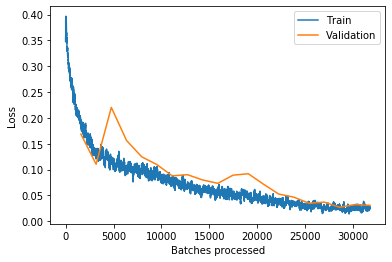

In [0]:
learn.recorder.plot_losses()

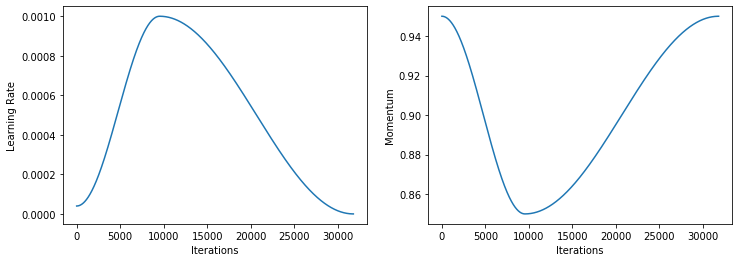

In [0]:
learn.recorder.plot_lr(show_moms=True)

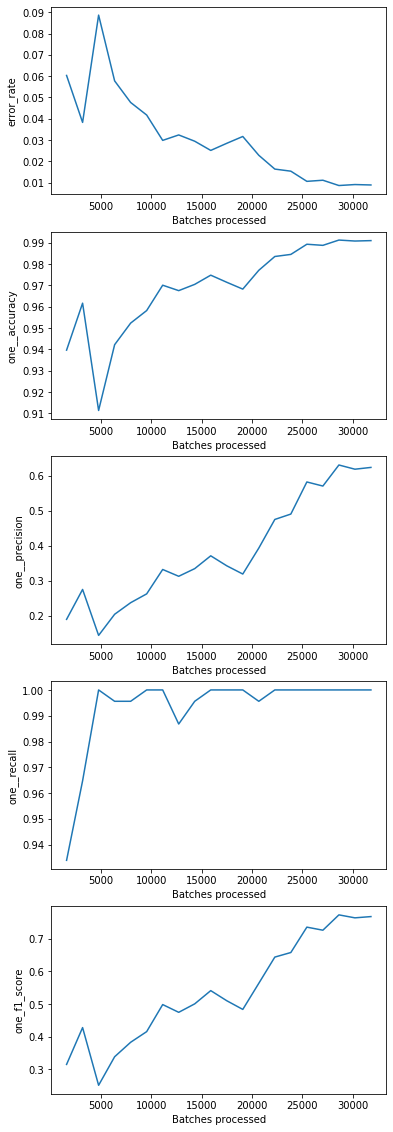

In [0]:
# metrics ate not meaningful because the validation set is part of the joint
# training set
learn.recorder.plot_metrics()

In [0]:
# Load 'test' data as valid_ds
data_loaded = ImageDataBunch.from_folder(PATCHES, ds_tfms=tfms, valid='test', size=71, bs=bs)

# Reduce to 2 classes
y_dict = {0:0, 1:1, 2:0}
data_loaded.train_ds.y.items = np.array([y_dict[o] for o in data_loaded.train_ds.y.items])
data_loaded.valid_ds.y.items = np.array([y_dict[o] for o in data_loaded.valid_ds.y.items])
data_loaded.classes = ['background', 'mitosis']
data_loaded.c = 2

# Validate on test set
learn.data.valid_ds.x.items = data_loaded.valid_ds.x.items
learn.data.valid_ds.y.items = data_loaded.valid_ds.y.items
learn.load((MODELS/'2020-01-16_resnet18_71_x_71_v3_s2').absolute())
learn.validate(data.valid_ds)
# train_loss, valid_loss, accuracy, precision, recall, f1_score	

[0.063671924,
 tensor(0.0146),
 tensor(0.9854, device='cuda:0'),
 tensor(0.5580, device='cuda:0'),
 tensor(0.6158, device='cuda:0'),
 tensor(0.5855, device='cuda:0')]

In [0]:
# Test previous model
learn.load((MODELS/'2020-01-21_resnet18_71_x_71_v7_s2').absolute())
learn.validate()
# train_loss, valid_loss, accuracy, precision, recall, f1_score

[0.07648229,
 tensor(0.0137),
 tensor(0.9863, device='cuda:0'),
 tensor(0.6000, device='cuda:0'),
 tensor(0.5320, device='cuda:0'),
 tensor(0.5640, device='cuda:0')]

### Find the best prediction threshold

As default the decision threshold is 0.5 for predicting non_mitosis vs. mitosis. Obviously, if this value is changed the metrics will change aswell, because the false positive, false negative, true positive, and true negative values will change. The aim of this project is to maximize the F1-score, so it is evaluated how the decision threshold has to be shifted to improve the results.

In [0]:
# Load training data
tfms = get_transforms(do_flip=True, flip_vert=True, max_rotate=360.0, max_zoom=1.25, 
              max_lighting=0.1, max_warp=0.1, p_affine=0.75, p_lighting=0.75)
bs = 48 # batch size

# original training set
data = ImageDataBunch.from_folder(PATCHES, ds_tfms=tfms, size=71, bs=bs)

# Retrieve data set mean and std for normalization
n_batches = (len(data.train_ds.x.items)-1) // bs +1
stats_mean, stats_std = data.batch_stats()
for i in range(n_batches-1):
  i_mean, i_std = data.batch_stats()
  stats_mean += i_mean
  stats_std += i_std
dataset_stats = stats_mean/n_batches, stats_std/n_batches
print("mean and std of the training set are {}".format(dataset_stats))

data.normalize(dataset_stats)

# Reduce to 2 classes
y_dict = {0:0, 1:1, 2:0}
data.train_ds.y.items = np.array([y_dict[o] for o in data.train_ds.y.items])
data.valid_ds.y.items = np.array([y_dict[o] for o in data.valid_ds.y.items])
data.classes = ['background', 'mitosis']
data.c = 2

weights = [1.0, 1.0]
class_weights=torch.FloatTensor(weights).cuda()
metrics = [error_rate, one_Accuracy(), one_Precision(target_class=1), 
           one_Recall(target_class=1), one_F1Score(target_class=1)]
crit = nn.CrossEntropyLoss(weight=class_weights)
learn = cnn_learner(data, models.resnet18, loss_func=crit, metrics=metrics, 
                     callback_fns=ShowGraph)

learn.load((MODELS/'2020-01-21_resnet18_71_x_71_v7_s2').absolute())
learn.validate()
# train_loss, valid_loss, accuracy, precision, recall, f1_score

mean and std of the training set are (tensor([0.6839, 0.6195, 0.8356]), tensor([0.1774, 0.2068, 0.1401]))


[0.09636744,
 tensor(0.0179),
 tensor(0.9821, device='cuda:0'),
 tensor(0.4230, device='cuda:0'),
 tensor(0.5683, device='cuda:0'),
 tensor(0.4850, device='cuda:0')]

In [0]:
def prob_to_pred(y_prob:torch.Tensor, threshold:float=0.5) -> torch.Tensor:
    """Estimate the prediction based on the threshold between 0.0 to 1.0"""
    return (y_prob > threshold).type(torch.LongTensor)


def acc_prec_rec_f1sc(y_true:torch.Tensor, y_pred:torch.Tensor) -> torch.Tensor:
    """Return accuracy, precison, recall and F1-score"""

    tp = (y_true * y_pred).sum().item()
    tn = ((1 - y_true) * (1 - y_pred)).sum().item()
    fp = ((1 - y_true) * y_pred).sum().item()
    fn = (y_true * (1 - y_pred)).sum().item()
    
    epsilon = 1e-10
    
    accuracy = (tp+tn) / (tp+tn+fp+fn)
    try:    precision = tp / (tp + fp)
    except: precision = tp / (tp + fp + epsilon)
    try:    recall = tp / (tp + fn)
    except: recall = tp / (tp + fn + epsilon)
    
    try:    f1 = 2* (precision*recall) / (precision + recall)
    except: f1 = 2* (precision*recall) / (precision + recall + epsilon)
    return accuracy, precision, recall, f1

In [0]:
y_probs = []
y_trues = []
for x, y in zip(learn.data.valid_ds.x, learn.data.valid_ds.y.items):
  prob = learn.predict(x)[2][1]
  
  y_probs.append(prob.item())
  y_trues.append(y)

In [0]:
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for thresh in thresholds:
  y_preds = prob_to_pred(y_prob=torch.tensor(y_probs), threshold=thresh)
  metrics = acc_prec_rec_f1sc(y_true=torch.tensor(y_trues), y_pred=y_preds)
  print('threshold', thresh, '\n', metrics) 
# accuracy, precision, recall, f1_score

threshold 0.1 
 (0.9791503267973857, 0.382051282051282, 0.6563876651982379, 0.4829821717990275)
threshold 0.2 
 (0.9803921568627451, 0.3988919667590028, 0.6343612334801763, 0.489795918367347)
threshold 0.3 
 (0.9806535947712418, 0.39941690962099125, 0.6035242290748899, 0.48070175438596496)
threshold 0.4 
 (0.9813725490196078, 0.409375, 0.5770925110132159, 0.4789762340036563)
threshold 0.5 
 (0.9820915032679739, 0.42295081967213116, 0.5682819383259912, 0.48496240601503754)
threshold 0.6 
 (0.982483660130719, 0.4300341296928328, 0.5550660792951542, 0.48461538461538456)
threshold 0.7 
 (0.9833333333333333, 0.44964028776978415, 0.5506607929515418, 0.495049504950495)
threshold 0.8 
 (0.983921568627451, 0.46441947565543074, 0.5462555066079295, 0.5020242914979758)
threshold 0.9 
 (0.9849019607843137, 0.491869918699187, 0.5330396475770925, 0.5116279069767442)


A threshold of 0.9 shows the best F1-score for the given training and validation data. The further the threshold approaches 1.0 the less mitosis predictions will be returned. It must be noted that this value is very sensitive to the trained weights and the provided data. Therefore the lower value of 0.8 will be chosen because it leaves higher tolerance for future unknown datasets.

In [0]:
# Apply the found prediction threshold
# Load 'test' data as valid_ds
data_loaded = ImageDataBunch.from_folder(PATCHES, ds_tfms=tfms, valid='test', size=71, bs=bs)

# Reduce to 2 classes
y_dict = {0:0, 1:1, 2:0}
data_loaded.train_ds.y.items = np.array([y_dict[o] for o in data_loaded.train_ds.y.items])
data_loaded.valid_ds.y.items = np.array([y_dict[o] for o in data_loaded.valid_ds.y.items])
data_loaded.classes = ['background', 'mitosis']
data_loaded.c = 2

# Validate on test set
data.valid_ds.x.items = data_loaded.valid_ds.x.items
data.valid_ds.y.items = data_loaded.valid_ds.y.items
learn.load((MODELS/'2020-01-16_resnet18_71_x_71_v3_s2').absolute())

# New thresholding
thresh = 0.8

y_probs = []
y_trues = []
for x, y in zip(learn.data.valid_ds.x, learn.data.valid_ds.y.items):
  prob = learn.predict(x)[2][1]
  
  y_probs.append(prob.item())
  y_trues.append(y)

y_preds = prob_to_pred(y_prob=torch.tensor(y_probs), threshold=thresh)
metrics = acc_prec_rec_f1sc(y_true=torch.tensor(y_trues), y_pred=y_preds)
metrics # accuracy, precision, recall, f1_score

(0.9872427983539095,
 0.6290322580645161,
 0.5763546798029556,
 0.6015424164524421)

The final result of our proposed model on the ICPR14 dataset shows an F1-score of 0.602 which can be claimed state-of-the-art (07.02.2020).

### Full pipeline

Starting from COCO-format, input 1 slide, return slide with markings

In [0]:
def CDA_service_71_x_71(img_path, path_patches):
  '''Return given image with mitosis annotated image using inference method of fastai 
  '''
  ppz = 71//2
  img_name = Path(img_path).name
  # retrieve image
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = normalizer.transform(img)
  shape = img.shape[:2]

  # find proposal
  img_list, img_indices = find_proposal_centroids(img) # function previously defined
  intensities = np.array([img_list[-1][ind[0],ind[1]] for ind in img_indices])
  indexes_sort = (intensities.argsort())[::-1] # highest intensity at position 0
  intensities_arr = intensities[indexes_sort]
  img_indices_arr = np.array(img_indices)[indexes_sort]
  img_indices = img_indices_arr.tolist()

  # extract patches and infer
  patches = extract_patches_from_centers(img_indices[:45], shape, (71,71)) # function previously defined
  patch_to_process = []
  for i2, patch in enumerate(patches):

    patch_to_process.append((PATH_WORK/'orig_{0:0>2}_{1:0>4}_{2:0>4}_{3:0>4}.bmp'
          .format(img_name[:-4], i2, patch[0], patch[1])).absolute().as_posix())
    cv2.imwrite(patch_to_process[-1], img_list[ 0][patch[0]:patch[0]+patch[2], patch[1]:patch[1]+patch[3]].astype('uint8'))
    
    patch_fastai = open_image(patch_to_process[-1])
    result = learn.predict(patch_fastai)

    # retrieving mitosis prediction confidence
    conf = result[2].numpy()[1]
    if str(result[0]) == 'mitosis' and conf>0.8:
      img = add_stiff_bbox(img, patch_to_process[-1],conf) #bbox and mask and annotation
  return(img)

def add_stiff_bbox(img, patch_path,thresh):
  '''Draw bounding box on the given image'''
  h_tl, w_tl = [int(o) for o in Path(patch_path).name[:-4].split('_')[-2:]]
  bb_h, bb_w = 71, 71
  img = add_annot(img,h_tl,w_tl,thresh)
  cv2.rectangle(img,(w_tl,h_tl),(w_tl+bb_w,h_tl+bb_h),(255,255,255),2) 
  return (img)

def add_annot(img,y,x,t):
  '''Draw annotation on given image'''
  font = cv2.FONT_HERSHEY_SIMPLEX
  fontScale = 1.2
  fontColor = (255,255,255)
  lineType = 2
  t = "%.3f" % t
  cv2.putText(img,'mitosis ' + str(t), (x+71,y), font, 
    fontScale, fontColor, lineType)
  return (img)

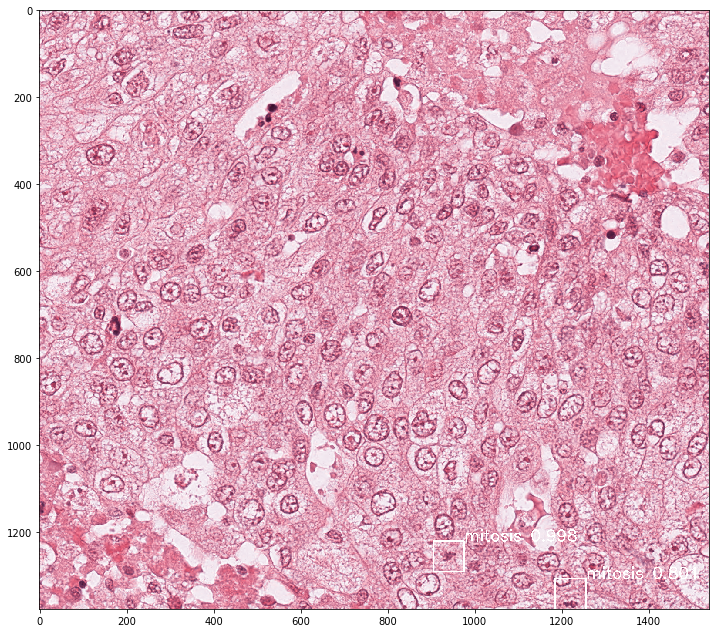

In [0]:
#---- Inference -----
from timeit import default_timer as timer
# define the paths of the data, model and work
PATH_COCO = Path('gdrive/My Drive/Germany/Small_Study_Group/CDA/Data/ICPR14/coco_format')
MODELS = Path('gdrive/My Drive/Germany/Small_Study_Group/CDA/Models')
PATH_WORK = Path('gdrive/My Drive/Germany/Small_Study_Group/CDA/Data/ICPR14/coco_format/working_folder')
try:os.mkdir(PATH_WORK)
except: pass

# retrieve data
train_images, train_lbl_bbox = get_annotations(PATH_COCO/'train.json')
val_images, val_lbl_bbox     = get_annotations(PATH_COCO/'valid.json')
images, lbl_bbox = train_images+val_images, train_lbl_bbox+val_lbl_bbox

# initialize and fit normalizer
target = staintools.read_image((path / 'train/{}'.format(images[0]) ).absolute().as_posix())
normalizer = staintools.StainNormalizer(method='macenko')
normalizer.fit(target)

#INFORMATION: the path to the folder of the "export.pkl" file should be given. 
# The "homemade" functions have to be initialized(one_accuracy, one_precision...)
# load the model
learn = load_learner((MODELS))
 
# start inference
t_start = timer()
img_CDA = CDA_service_71_x_71((PATH_COCO/'train'/images[1]).absolute().as_posix(), PATH_WORK)
t_end = timer()
plt.figure(figsize=(12,12))
plt.imshow(img_CDA)
plt.show()

In [1]:
print('Inference time')
print(t_end-t_start)

Inference time
8.166256671000156


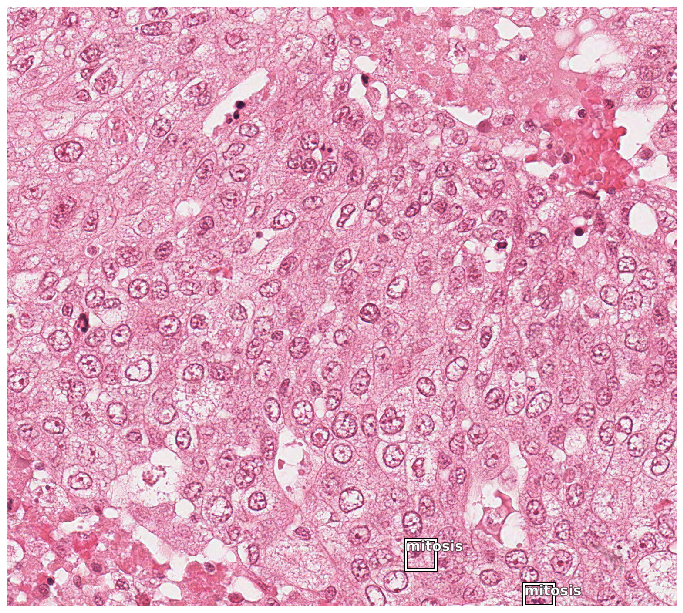

In [0]:
#---- Ground truth -----
img_load = open_image(PATH_COCO/'train'/images[1])

# pre-process bbox
lbl =lbl_bbox[1][0]
bbox = []
for l in lbl:
  p1 = [i-34 for i in l[:2]]
  p2 = [i+34 for i in l[2:]]
  temp = p1+p2
  if(len(bbox)==0):
    bbox = temp
  else:
    bbox = [bbox ,temp]
lbl_0 = np.zeros((len(bbox),), dtype=int)
bbox = ImageBBox.create(*img_load.size, bbox, labels =lbl_0,classes=['mitosis'])

# display ground truth
img_load.show(figsize=(12,12), y=bbox)

## Discussion and Future Work

We believe that there are several ways to improve the robustness this project. First of all, the annotations of the data we use are not perfect. If the annotations are more centered and, additionally, if more pathologists inspect and annotate the data, the predictions on the test data will improve. Furthermore, different datasets (e.g. TUPAC16, ICPR12) could be blended into the train set in order to increase the amount of the data. Alternatively, transfer learning could be used as well to fine-tune the model according to these datasets. Moreover, we think that our model can be used as a pre-trained network for similar medical tasks (e.g. melanoms, diabetes), so that other people working in this area can make use of it while training their own model. 

For decreasing the computational intensity of the preprocessing stepts, the gaussian filtering may be reduced to a single matrix multiplication. The reason for the original modularity is a more flexible behaviour if parameters are changed.

As in the work of Das & Dutta (2019), integrating Haar-Wavelet Decomposition into the pipeline might help us to reduce the noise in images. Also, it is possible to have some information loss on the edges of .tiff files. One possible solution is neglecting them in object detection after overlapping the image croppings in a more integrated way. 

One other possible improvement is performing feature learning via and Encoder-Decoder prior to learning the classifier. This makes the network learn abstract parameters for the patches in advance. And lastly, a bigger deep neural network, such as ResNet50 or ResNet101, may be used in training. We did observe only a slight improvement from ResNet18 to ResNet34 and decided to go with the less complex solution. However, with better hardware specifications, bigger networks are likely to archieve higher scores.

As we mentioned earlier, we worked with Freiburg Hospital's data as well, but dropped that part of the project due to time limitations. Therefore, more time should be invested in .mrxs files to process them and then use them to train the network.
Also for real life use, a heatmap feature that highlights mitotic regions will be very useful for end users.

## Conclusion

Following Das & Dutta (2019)'s approach, we developed a similar pipeline for detecting mitotic cells on breast cancer images, using more advanced heuristics and a pretrained CNN (ResNet18), and achieved a higher F1-Score of 0.602 on ICPR14 dataset than the current state-of-the-art. We first stain normalize the images, then use the heuristic methods to extract patches of candidate cells. These patches are classified as mitotic or not using a deep CNN. In other words, we showed that better performance for this task can be achieved using optimized heuristics and a pretrained CNN. However, the results show that there is still room for improvement, and with the help of technological advancements in machine learning, humanity will get much better in detecting and thus treating cancer in the near future.

## References

Li, C., Wang, X., Liu, W., & Latecki, L. J. (2018). DeepMitosis: Mitosis detection via deep detection, verification and segmentation networks. Medical Image Analysis, 45, 121–133. https://doi.org/10.1016/j.media.2017.12.002

International Conference on Pattern Recognition, MITOS-ATYPIA-14 Challenge,
2014, Available from World Wide Web: (https://mitos-atypia-14.
grand-challenge.org).

Das, D. K., & Dutta, P. K. (2019). Efficient automated detection of mitotic cells from breast histological images using deep convolution neutral network with wavelet decomposed patches. Computers in Biology and Medicine, 104(May 2018), 29–42. https://doi.org/10.1016/j.compbiomed.2018.11.001

Lin, T. Y., Goyal, P., Girshick, R., He, K., & Dollar, P. (2017). Focal Loss for Dense Object Detection. Proceedings of the IEEE International Conference on Computer Vision, 2017–October, 2999–3007. https://doi.org/10.1109/ICCV.2017.324

